In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
#this code is not working
# network = TwoLaternNet(...)
# optimizer = SGD()

for i in range(10000):
    '''
    x_batch, t_batch = get_mini_batch(...) #get mini batch
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    '''

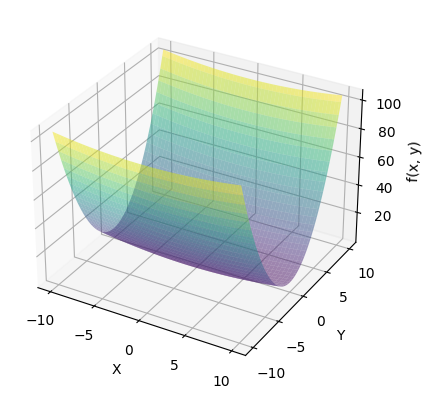

In [4]:
# create f(x, y) = (1/20)x^2 + y^2 3d graph
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return (1/20) * x**2 + y**2

# Create the grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha = 0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)');

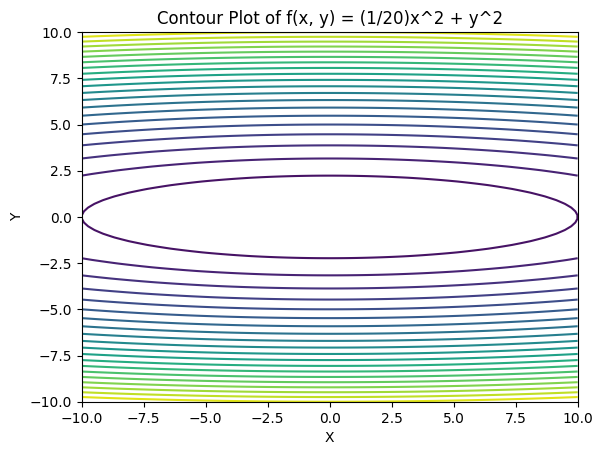

In [5]:
# Create the contour plot
def f(x, y):
    return (1/20) * x**2 + y**2

# Create the grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


plt.figure()
plt.contour(X, Y, Z, levels=20, cmap='viridis')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of f(x, y) = (1/20)x^2 + y^2');

In [6]:
# SGD : Stochastic Gradient Descent
#
# Momentum
#
# AdaGrad
#
# Adam


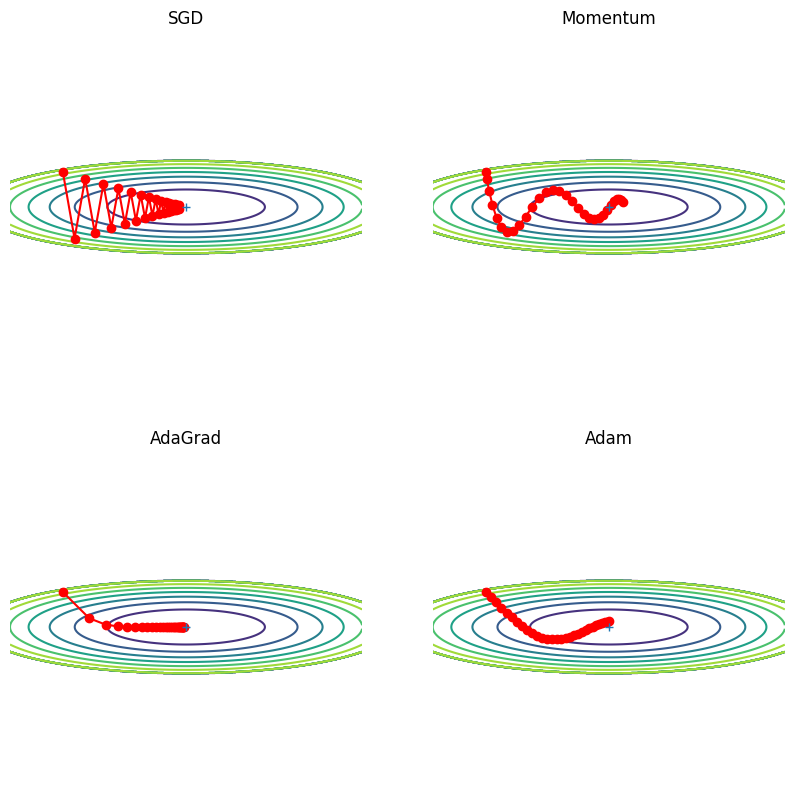

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

x = np.arange(-10, 10, 0.01)
y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 외곽선 단순화
mask = Z > 7
Z[mask] = 0

plt.figure(figsize=(10, 10))
idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('off')

plt.show()


===========iteration:0===========
SGD:2.352102101726664
Momentum:2.285525107016463
AdaGrad:2.0219680921274077
Adam:2.2537889938213524
===========iteration:100===========
SGD:1.6638704138274745
Momentum:0.36963630226723876
AdaGrad:0.18531180379854628
Adam:0.20003395874090774
===========iteration:200===========
SGD:0.8663501887585836
Momentum:0.346113878174592
AdaGrad:0.17427222379580765
Adam:0.2714936733239047
===========iteration:300===========
SGD:0.602412503969741
Momentum:0.18733844887071416
AdaGrad:0.11124140759996148
Adam:0.1544201097484473
===========iteration:400===========
SGD:0.5242887186948681
Momentum:0.22735862420836306
AdaGrad:0.09274360453268776
Adam:0.1969856512335515
===========iteration:500===========
SGD:0.40905718400572877
Momentum:0.18317479900054032
AdaGrad:0.06521374888229323
Adam:0.09237184344825863
===========iteration:600===========
SGD:0.4379831421151846
Momentum:0.15198761849715092
AdaGrad:0.0685943434344427
Adam:0.13119553031343853
===========iteration:700==

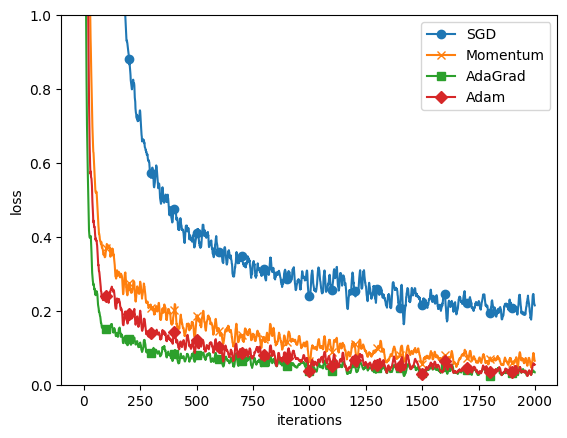

In [8]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

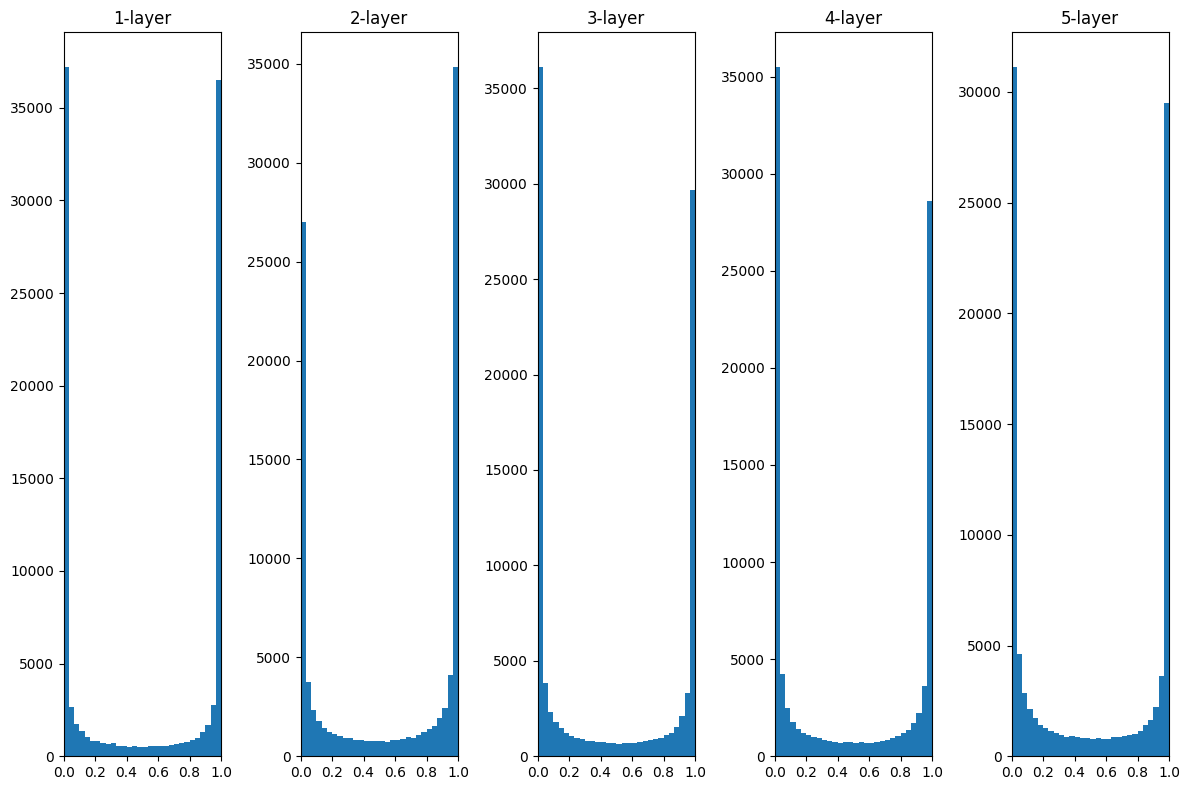

In [9]:
# weight initiall value
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

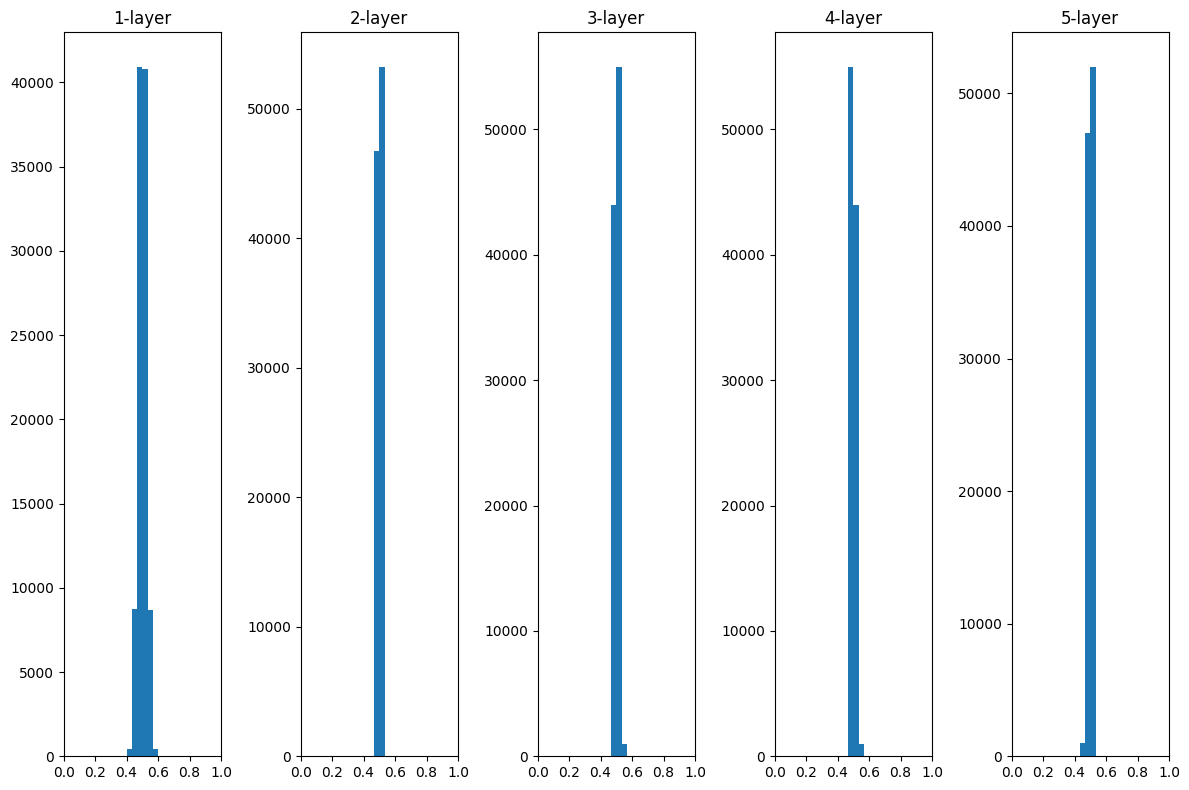

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

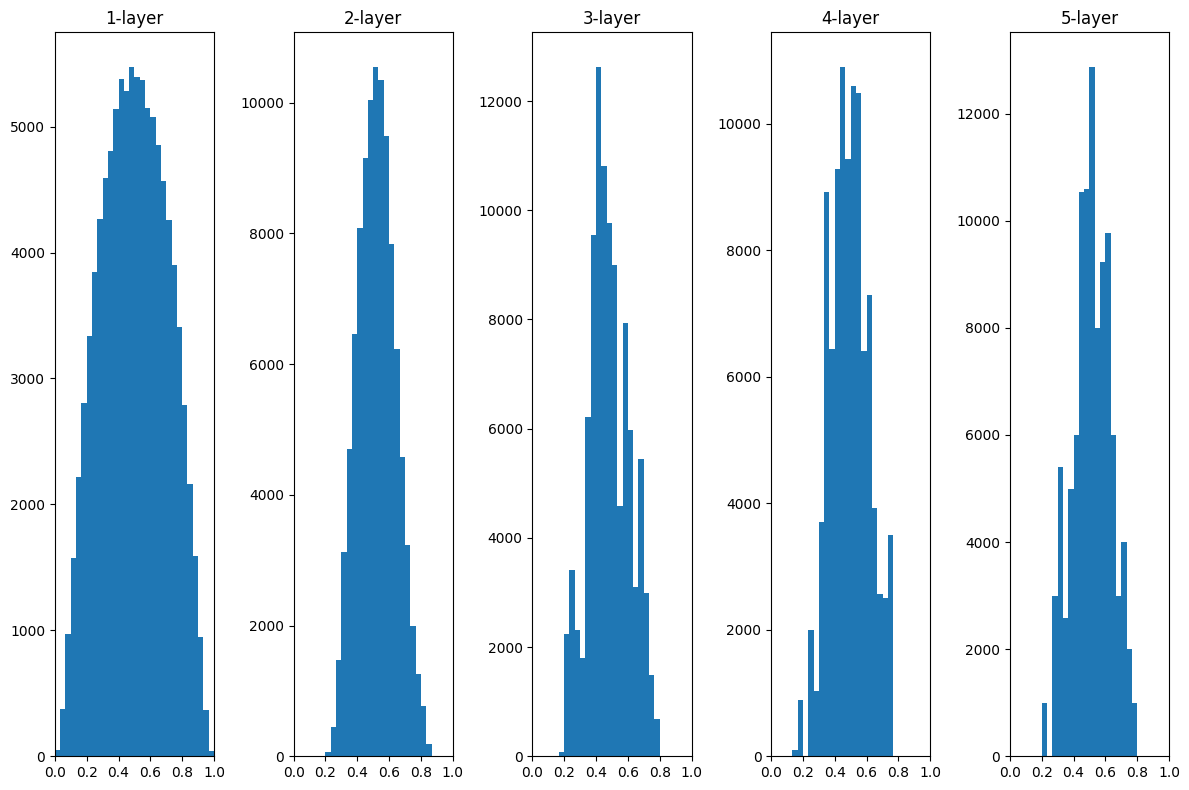

In [11]:
# Xviear initial value
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    a = np.dot(x, w)
    z = sigmoid(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

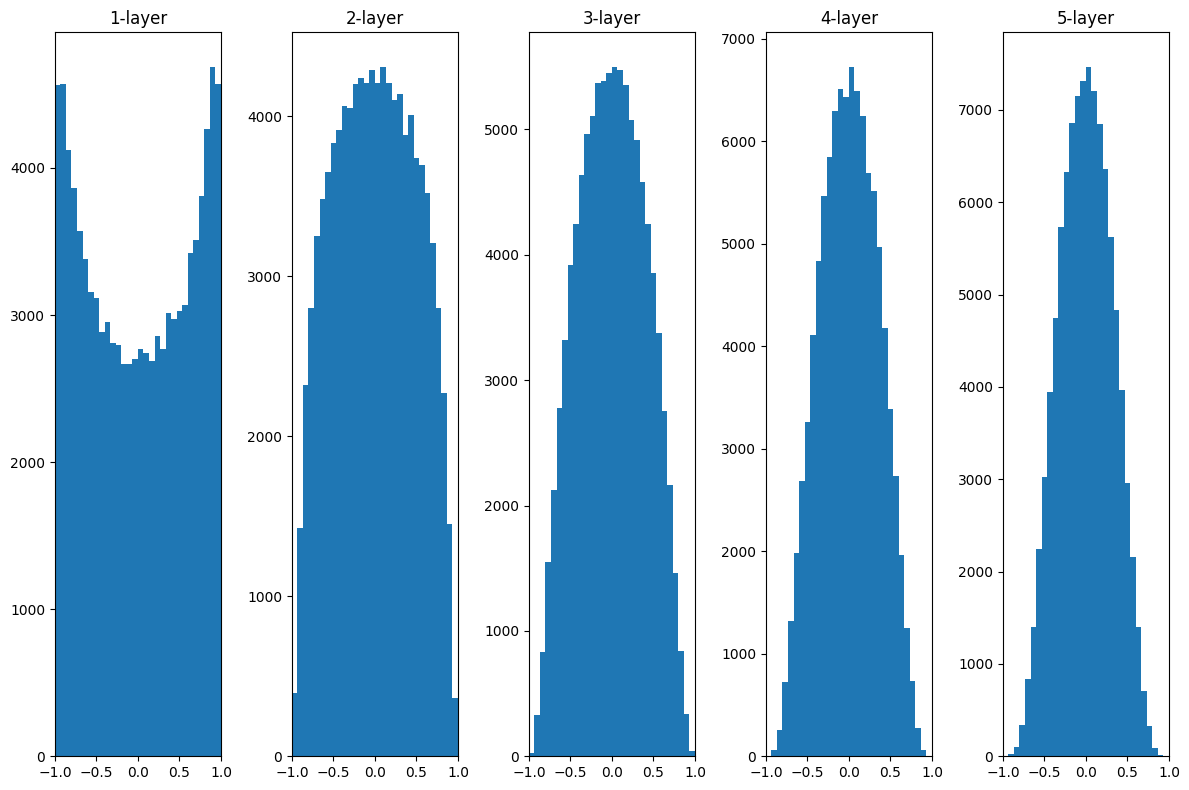

In [12]:
# tanh initial value / This function is not desirable

def tanh(x):
    return np.tanh(x)

x = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)

    a = np.dot(x, w)
    z = tanh(a)
    activations[i] = z

plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(-1, 1))
    plt.axis([-1.0, 1.0, 0, None])
    plt.xticks([-1, -0.5, 0, 0.5, 1])
    plt.tight_layout()

plt.show()


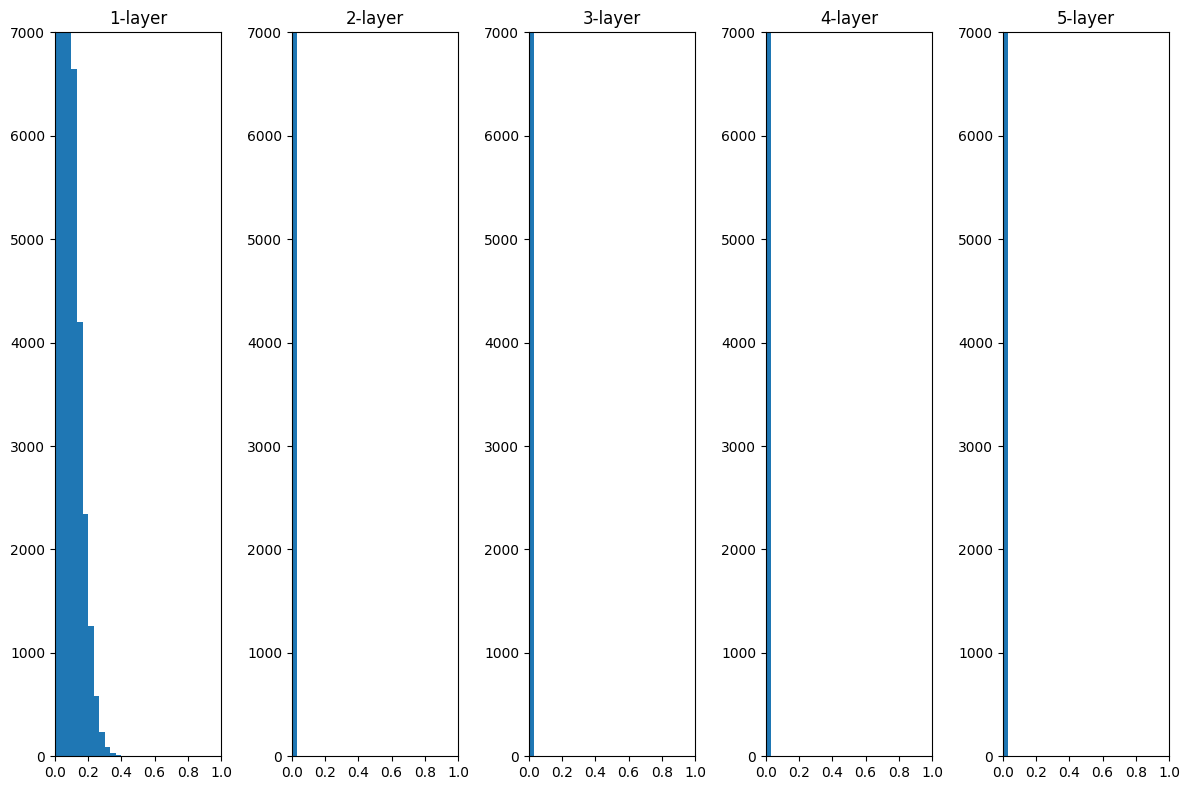

In [13]:
# ReLU and HE initial value

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.ylim(0, 7000)
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

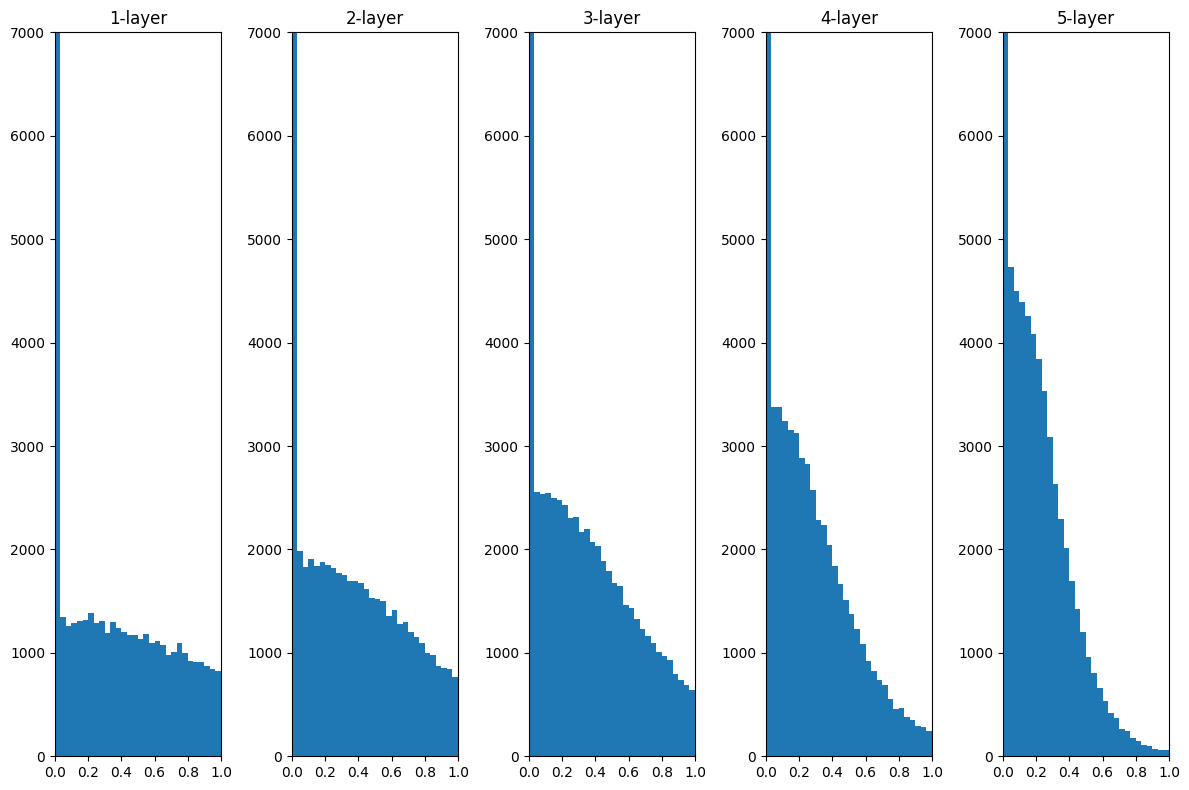

In [14]:
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.ylim(0, 7000)
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

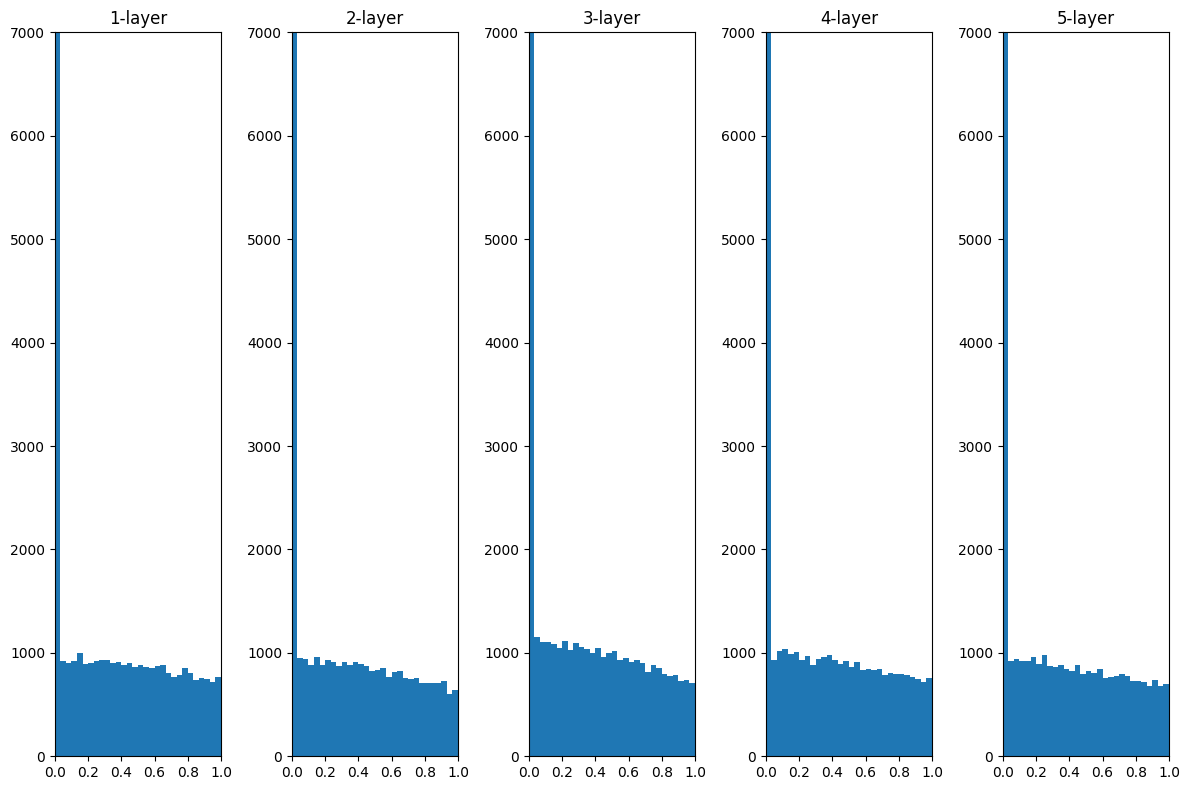

In [15]:
def ReLU(x):
    return np.maximum(0, x)

x = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5
activations = {}  # 이곳에 활성화 결과를 저장

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)
    a = np.dot(x, w)
    z = ReLU(a)
    activations[i] = z


plt.figure(figsize=(12, 8))

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0,1))
    plt.ylim(0, 7000)
    plt.axis([0.0, 1.0, 0, None])
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    plt.tight_layout()
plt.show()

===========iteration:0===========
std=0.01:2.3024898807915477
Xavier:2.3162172891681454
He:2.303873923676899
===========iteration:100===========
std=0.01:2.3017115121172775
Xavier:2.240794430653243
He:1.7766444374763888
===========iteration:200===========
std=0.01:2.302542005182427
Xavier:2.104997414244618
He:0.9376709361013623
===========iteration:300===========
std=0.01:2.3007945584419134
Xavier:1.749990129604401
He:0.5622047428219054
===========iteration:400===========
std=0.01:2.3019304355169883
Xavier:1.2408025084606384
He:0.42079928727381555
===========iteration:500===========
std=0.01:2.2998553960535006
Xavier:1.0717116988891005
He:0.5661125420180587
===========iteration:600===========
std=0.01:2.3030822248083123
Xavier:0.6602788546873721
He:0.3280956405269027
===========iteration:700===========
std=0.01:2.2992586778565607
Xavier:0.5270401876226453
He:0.28436754658775365
===========iteration:800===========
std=0.01:2.30230469707253
Xavier:0.5782768775974058
He:0.3782891042011195

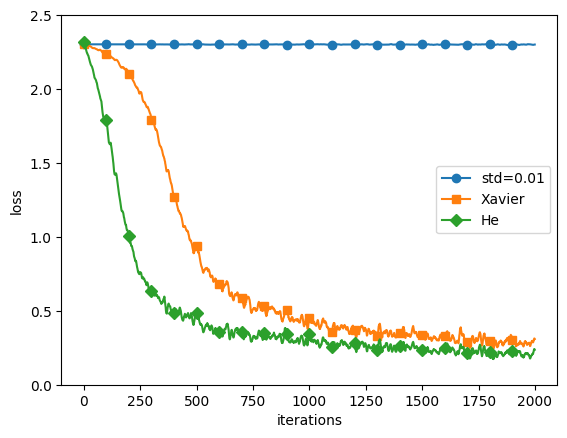

In [16]:
# coding: utf-8
import os
import sys

from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

================== 1/16 ==================
last epoch:	train: 0.097 test: 0.433
================== 2/16 ==================
last epoch:	train: 0.097 test: 0.523
================== 3/16 ==================
last epoch:	train: 0.967 test: 0.632
================== 4/16 ==================
last epoch:	train: 0.883 test: 0.786
================== 5/16 ==================
last epoch:	train: 0.305 test: 0.864
================== 6/16 ==================
last epoch:	train: 0.117 test: 0.941
================== 7/16 ==================
last epoch:	train: 0.117 test: 0.994
================== 8/16 ==================
last epoch:	train: 0.117 test: 0.998
================== 9/16 ==================
last epoch:	train: 0.117 test: 1.0
================== 10/16 ==================
last epoch:	train: 0.117 test: 0.997
================== 11/16 ==================
last epoch:	train: 0.116 test: 0.99
================== 12/16 ==================
last epoch:	train: 0.116 test: 0.809
================== 13/16 ===============

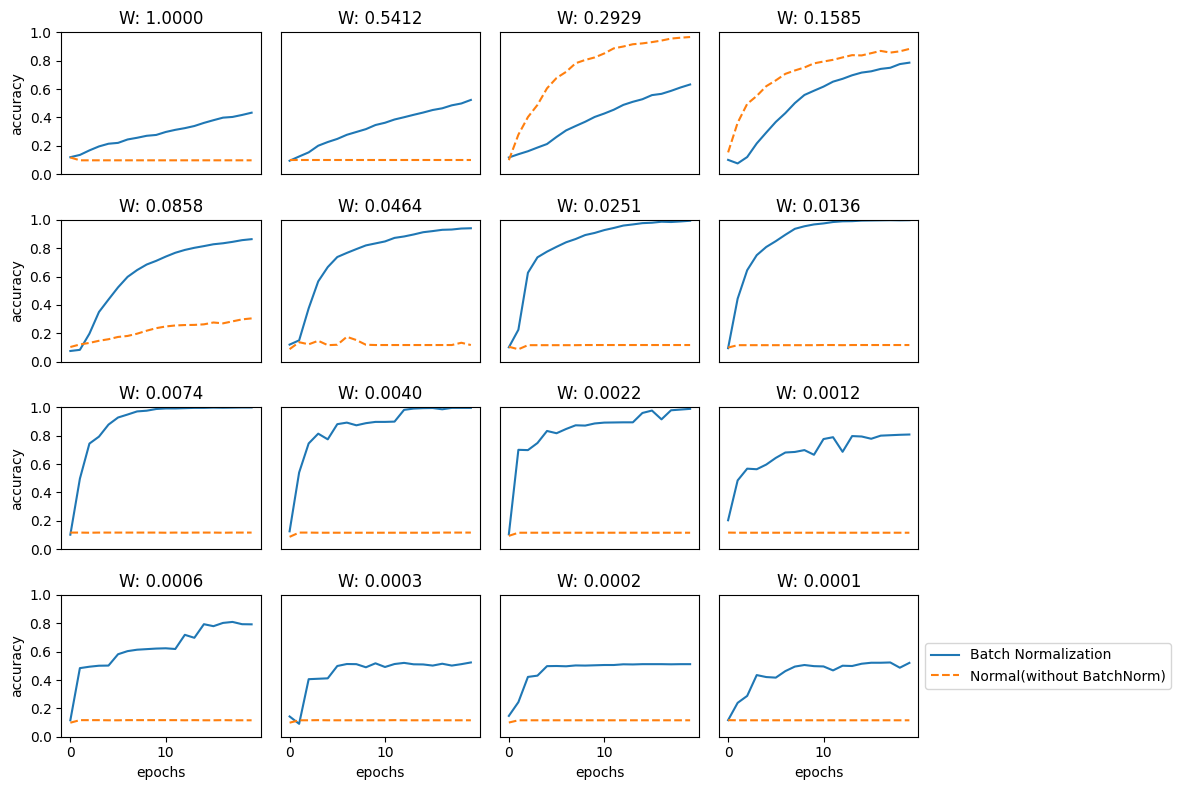

In [17]:
# batch normalization

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            if epoch_cnt == 19:
                print(f"last epoch:\ttrain: {str(train_acc)} test: {str(bn_train_acc)}")
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list
    
plt.figure(figsize=(12, 8))

# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "================== " + str(i+1) + "/16" + " ==================")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title(f"W: {w:.4f}")
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
         
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.tight_layout()    
plt.show()

In [18]:
# overfitting
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    Batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[Batch_mask]
    t_batch = t_train[Batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

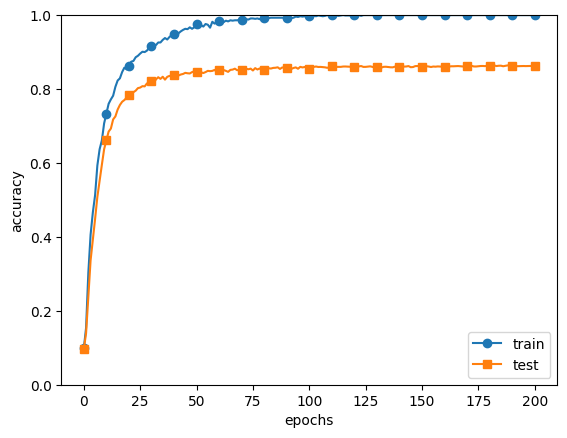

In [19]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

epoch: 0	, train acc:	0.1000, test acc:	0.0947
epoch: 20	, train acc:	0.4767, test acc:	0.3564
epoch: 40	, train acc:	0.6300, test acc:	0.4834
epoch: 60	, train acc:	0.7567, test acc:	0.6029
epoch: 80	, train acc:	0.8067, test acc:	0.6441
epoch: 100	, train acc:	0.8433, test acc:	0.6740
epoch: 120	, train acc:	0.8467, test acc:	0.6850
epoch: 140	, train acc:	0.8700, test acc:	0.6879
epoch: 160	, train acc:	0.8867, test acc:	0.7015
epoch: 180	, train acc:	0.8767, test acc:	0.7067
epoch: 200	, train acc:	0.8667, test acc:	0.7017


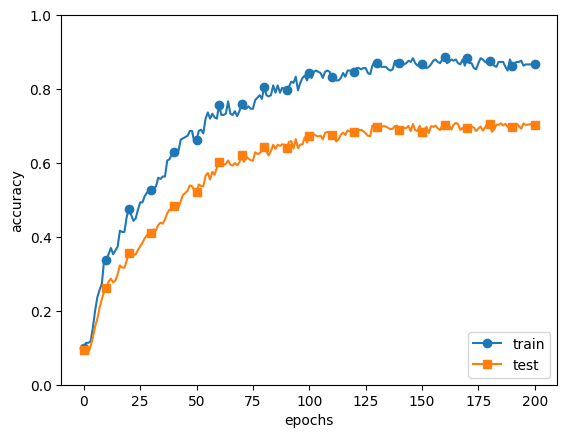

In [20]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        if epoch_cnt %20 == 0:
            print(f"epoch: {epoch_cnt}\t, train acc:\t{train_acc:.4f}, test acc:\t{test_acc:.4f}")

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.2793305506603487
=== epoch:1, train acc:0.15, test acc:0.1415 ===
train loss:2.2962940985242333
train loss:2.3042768903073045
train loss:2.320279908274866
=== epoch:2, train acc:0.15666666666666668, test acc:0.1452 ===
train loss:2.314285519941392
train loss:2.2744718882766257
train loss:2.293052349967583
=== epoch:3, train acc:0.16, test acc:0.1474 ===
train loss:2.29751907771823
train loss:2.292110957066567
train loss:2.274993693774076
=== epoch:4, train acc:0.17, test acc:0.1527 ===
train loss:2.2924910489379724
train loss:2.2923382656351823
train loss:2.2584437730725924
=== epoch:5, train acc:0.18, test acc:0.1609 ===
train loss:2.2739293995352354
train loss:2.300625851083427
train loss:2.2549175375625157
=== epoch:6, train acc:0.18666666666666668, test acc:0.1668 ===
train loss:2.286751285689417
train loss:2.2940904982070474
train loss:2.265871600998916
=== epoch:7, train acc:0.19666666666666666, test acc:0.1735 ===
train loss:2.2833349786601373
train loss:2.283898286

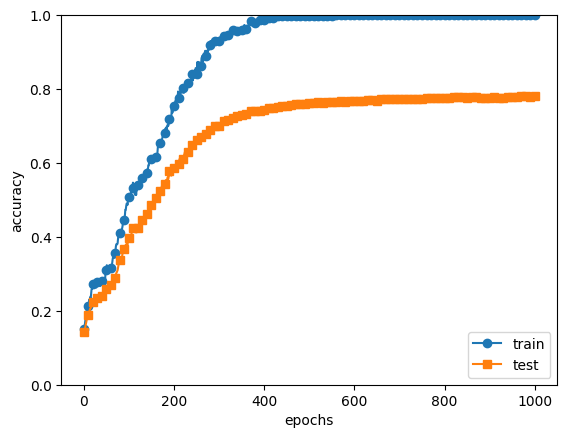

In [21]:
# dropout

from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=1001, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [25]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블
    
    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

# hyperparameter optimization
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 검증 데이터를 분할(훈련 데이터의 20%)
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.86) | lr: 0.008711, weight decay: 7.619e-07
Best-2(val acc:0.84) | lr: 0.009259, weight decay: 1.014e-07
Best-3(val acc:0.83) | lr: 0.008087, weight decay: 5.552e-06
Best-4(val acc:0.82) | lr: 0.00912, weight decay: 3.81181e-05
Best-5(val acc:0.82) | lr: 0.008702, weight decay: 9.99855e-05
Best-6(val acc:0.81) | lr: 0.009952, weight decay: 3.30824e-05
Best-7(val acc:0.81) | lr: 0.009474, weight decay: 8.792e-07
Best-8(val acc:0.81) | lr: 0.008749, weight decay: 3.93213e-05
Best-9(val acc:0.8) | lr: 0.007951, weight decay: 1.107e-06
Best-10(val acc:0.8) | lr: 0.009236, weight decay: 1.516e-07
Best-11(val acc:0.79) | lr: 0.009275, weight decay: 6.979e-07
Best-12(val acc:0.78) | lr: 0.008942, weight decay: 1.13858e-05
Best-13(val acc:0.78) | lr: 0.00529, weight decay: 3.42865e-05
Best-14(val acc:0.78) | lr: 0.009436, weight decay: 3.9216e-06
Best-15(val acc:0.77) | lr: 0.007877, weight decay: 2.417e-06
Best-16(va

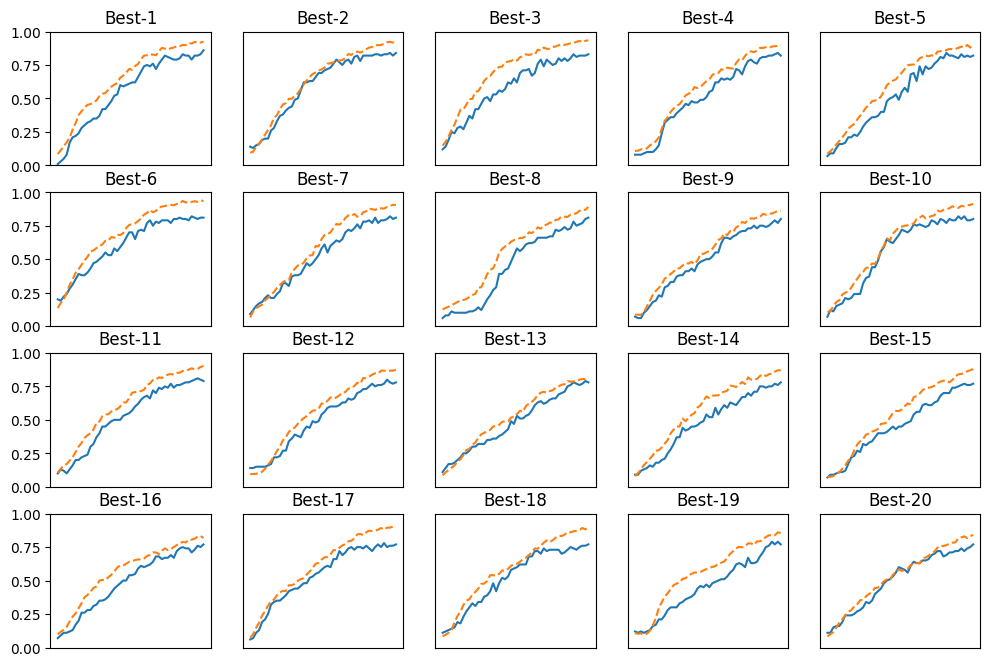

In [31]:
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 200
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-7, -4)
    lr = 10 ** np.random.uniform(-3, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    # print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr: " + str(round(lr, 6)) + ", weight decay: " + str(round(weight_decay, 10))
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(12, 8))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()